# Data Cleaning and Proprocessing

### Imports

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from data_cleaning_preprocessing._eda import explore_dataset, plot_categorical, plot_numerical_histogram
from data_cleaning_preprocessing._preprocessing import filter_by_date, preprocess_tweet

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachely/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rachely/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rachely/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rachely/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachely/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rachely/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rachely/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data

In [2]:
# Load datasets
company_df = pd.read_csv("data/Company.csv")
values_df = pd.read_csv("data/CompanyValues.csv")
company_tweet_df = pd.read_csv("data/Company_Tweet.csv")
tweet_df = pd.read_csv("data/Tweet.csv")

### Exploratory Data Analysis (EDA)

#### Company dataset

In [3]:
explore_dataset(company_df)

Summary of   ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc
5          MSFT    Microsoft
Shape: (6, 2) (rows, columns)

Data Types:
 ticker_symbol    object
company_name     object
dtype: object 

Missing Values:
 ticker_symbol    0
company_name     0
dtype: int64 

Unique Values per Column:
 ticker_symbol    6
company_name     5
dtype: int64 

Descriptive Statistics:
        ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq               1            2 

First 10 Rows:
   ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc
5          MSFT    Microsoft 



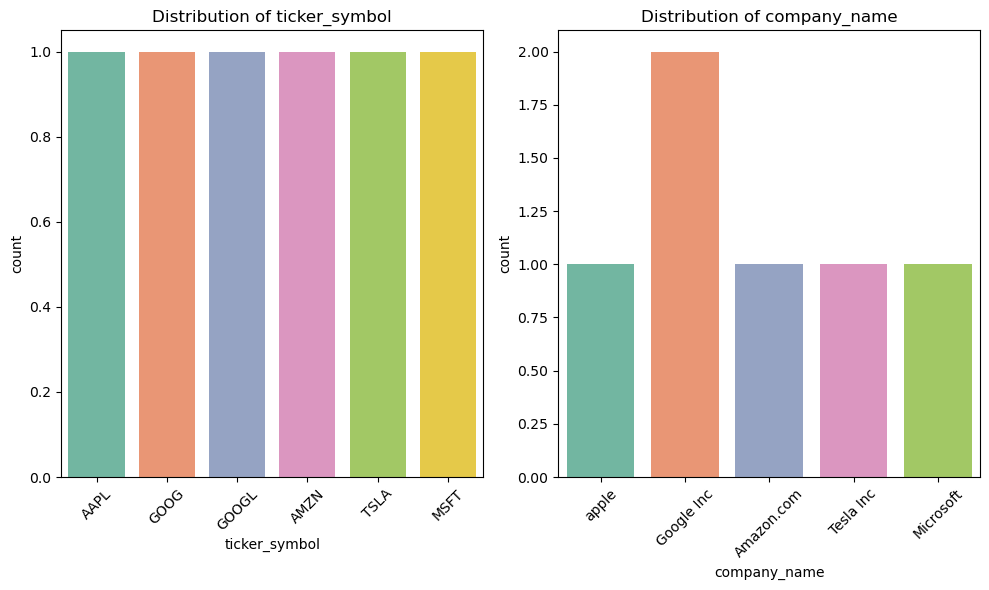

In [4]:
plot_categorical(company_df, ['ticker_symbol', 'company_name'])

#### Company values dataset

In [5]:
explore_dataset(values_df)

Summary of       ticker_symbol    day_date  close_value    volume  open_value  \
0              AAPL  2020-05-29       317.94  38399530      319.25   
1              AAPL  2020-05-28       318.25  33449100      316.77   
2              AAPL  2020-05-27       318.11  28236270      316.14   
3              AAPL  2020-05-26       316.73  31380450      323.50   
4              AAPL  2020-05-22       318.89  20450750      315.77   
...             ...         ...          ...       ...         ...   
17523          TSLA  2019-12-21       405.59  14785210      410.29   
17524          TSLA  2019-12-22       405.59  14785210      410.29   
17525          TSLA  2019-12-25       425.25   8054720      418.36   
17526          TSLA  2019-12-28       430.38   9956827      435.00   
17527          TSLA  2019-12-29       430.38   9956827      435.00   

       high_value  low_value  
0          321.15   316.4700  
1          323.44   315.6300  
2          318.71   313.0900  
3          324.24   316.

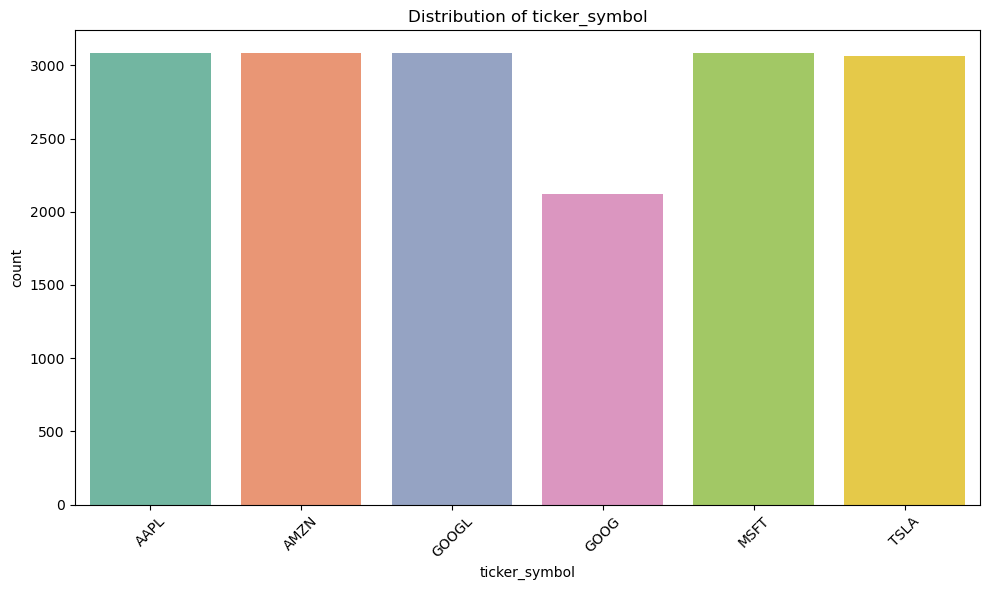

In [6]:
plot_categorical(values_df, ['ticker_symbol'])

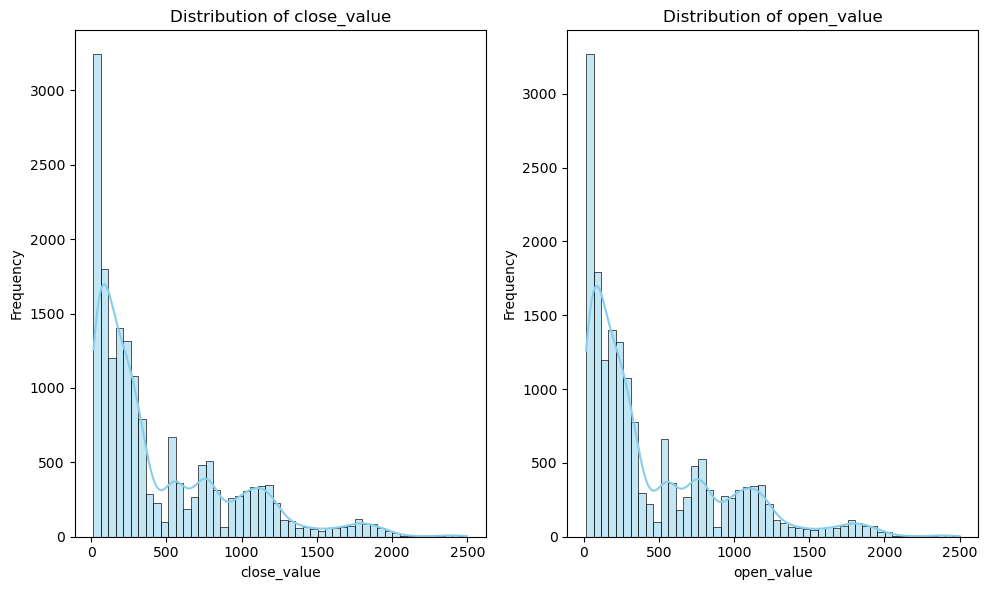

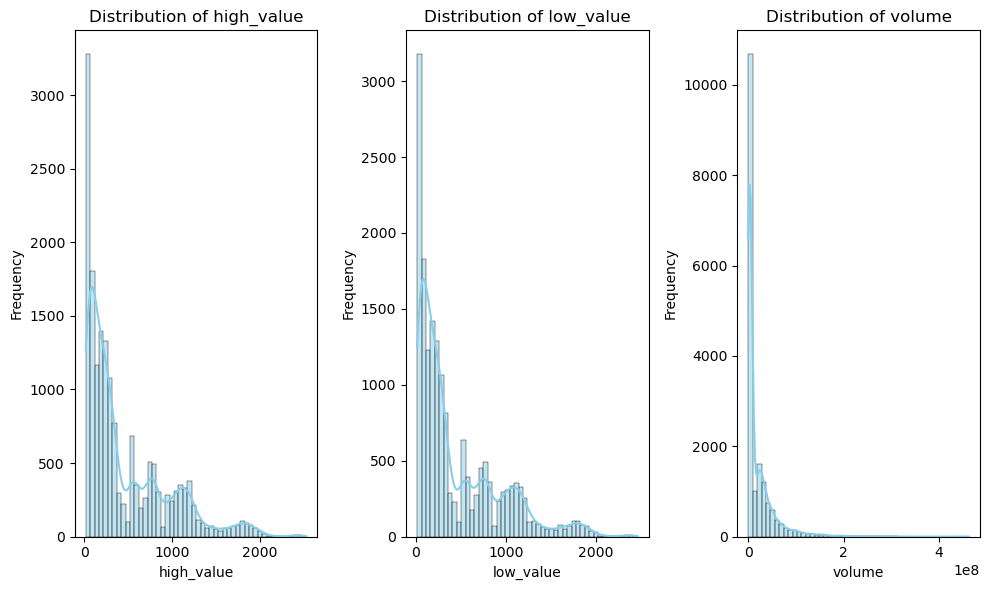

In [7]:
plot_numerical_histogram(values_df, ['close_value', 'open_value'], bins=50)
plot_numerical_histogram(values_df, ['high_value', 'low_value', 'volume'], bins = 50)

#### Campany tweet dataset

In [8]:
explore_dataset(company_tweet_df)

Summary of                     tweet_id ticker_symbol
0         550803612197457920          AAPL
1         550803610825928706          AAPL
2         550803225113157632          AAPL
3         550802957370159104          AAPL
4         550802855129382912          AAPL
...                      ...           ...
4336440  1212158772015034369          TSLA
4336441  1212159099632267268          TSLA
4336442  1212159184931717120          TSLA
4336443  1212159838882533376          TSLA
4336444  1212160015332728833          TSLA

[4336445 rows x 2 columns]
Shape: (4336445, 2) (rows, columns)

Data Types:
 tweet_id          int64
ticker_symbol    object
dtype: object 

Missing Values:
 tweet_id         0
ticker_symbol    0
dtype: int64 

Unique Values per Column:
 tweet_id         3717964
ticker_symbol          6
dtype: int64 

Descriptive Statistics:
            tweet_id
count  4.336445e+06
mean   8.834282e+17
std    1.927735e+17
min    5.504415e+17
25%    7.185450e+17
50%    8.825934e+17
75% 

#### Tweet dataset

In [9]:
explore_dataset(tweet_df)

Summary of                     tweet_id           writer   post_date  \
0         550441509175443456  VisualStockRSRC  1420070457   
1         550441672312512512      KeralaGuy77  1420070496   
2         550441732014223360      DozenStocks  1420070510   
3         550442977802207232     ShowDreamCar  1420070807   
4         550443807834402816     i_Know_First  1420071005   
...                      ...              ...         ...   
3717959  1212159765914079234        TEEELAZER  1577836383   
3717960  1212159838882533376    ShortingIsFun  1577836401   
3717961  1212160015332728833      Commuternyc  1577836443   
3717962  1212160410692046849      MoriaCrypto  1577836537   
3717963  1212160477159206912         treabase  1577836553   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Perform

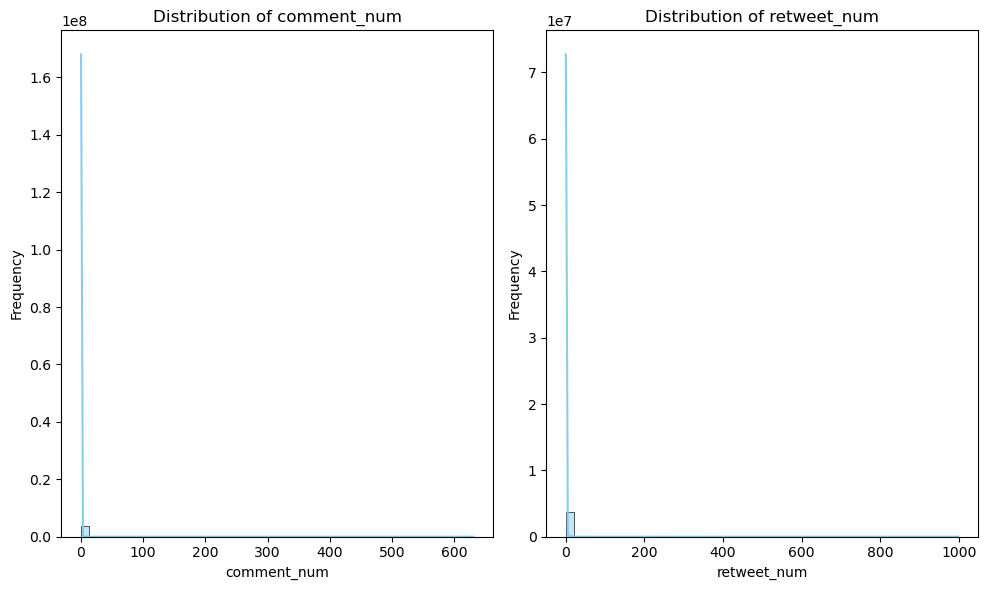

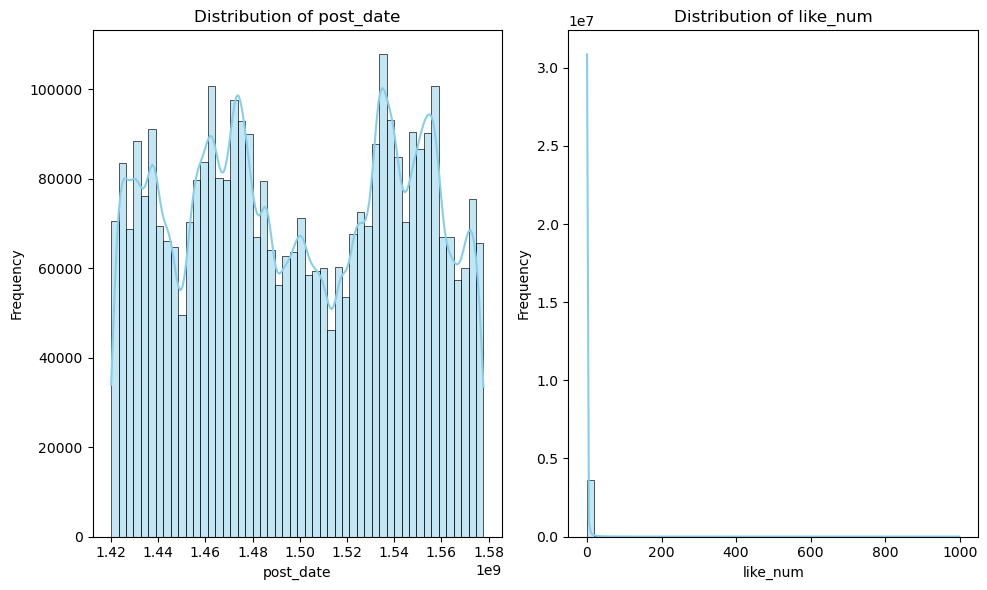

In [10]:
plot_numerical_histogram(tweet_df, ['comment_num', 'retweet_num'], bins=50)
plot_numerical_histogram(tweet_df, ['post_date', 'like_num'], bins=50)

### Data preprocessing

#### Merge datasets

We frist merge **Company Tweet** and **Tweet** datasets using the unique variable `tweet_id` to a new dataframe called **Sentiment**.

#### Sentiment data

In [11]:
sentiment_df = pd.merge(company_tweet_df, tweet_df, on = "tweet_id", how = "inner")

####  The `post_date` variable

The `post_date` column in the **Sentiment** data records the timestamp of each tweet. Since for this project we care about whether tweet sentiment of the day helps predict the stock price of the next day, we convert the `post_date` to datetime type and create a new column `day_date` so that it can be used as the key that merges **Company Values** and **Sentiment** for analysis of the next stages.

In [12]:
# Convert
sentiment_df['post_date'] = pd.to_datetime(sentiment_df['post_date'], unit = 's')
sentiment_df['day_date'] = pd.to_datetime(sentiment_df['post_date'].apply(lambda date: date.date())) 

In [13]:
# Sort by date
sentiment_df = sentiment_df.sort_values(by = 'day_date')

In [14]:
sentiment_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,day_date
0,550803612197457920,AAPL,SentiQuant,2015-01-01 23:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01
2863895,550687121154265089,MSFT,caroltheva,2015-01-01 16:16:55,A long term Bond market trade http://bit.ly/Bo...,0,0,0,2015-01-01
2863894,550687106746818560,MSFT,SSaints1,2015-01-01 16:16:52,$ZNGA's Shareholders Wait for Gain Is Ending h...,0,0,1,2015-01-01
2863893,550678413846261761,MSFT,caroltheva,2015-01-01 15:42:19,What are oscillator indicators http://bit.ly/o...,0,0,0,2015-01-01
2863892,550674530432454656,MSFT,WeinsteinTST,2015-01-01 15:26:53,Zynga's Shareholders Wait for Gain Is Ending h...,0,0,1,2015-01-01


#### Company value dataset

The `day_date` variable also need to be converted to the datetime type as it is still an Object now. In addition, we will only keep the values in the **Company Value** dataset if it is in between the earliest date and the lastest date of the **Sentiment** dataframe. We will called this modified dataframe **Stock**.

In [15]:
# Convert to datetime type
values_df['day_date'] = pd.to_datetime(values_df['day_date'])

In [16]:
# Filter by date
stock_df = filter_by_date(sentiment_df, values_df)

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [17]:
# Sort by date
stock_df = sentiment_df.sort_values(by = 'day_date')

In [18]:
stock_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,day_date
0,550803612197457920,AAPL,SentiQuant,2015-01-01 23:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01
275,550459042787651584,AAPL,petergo99037185,2015-01-01 01:10:37,"YR %, /-, $TSLA 47.85%, $FB 42.77%, $TWTR -...",0,0,0,2015-01-01
276,550456665607122944,AAPL,t_nathan95,2015-01-01 01:01:10,Had a down day of -.66%. Worst performer was $...,0,0,0,2015-01-01
277,550455384734183424,AAPL,StocksThatDoubl,2015-01-01 00:56:05,Want alerts for momentum stocks about to run? ...,0,0,0,2015-01-01
278,550453087731982336,AAPL,DCaptura,2015-01-01 00:46:57,"""http://iphone.appleinsider.com/articles/14/12...",0,3,3,2015-01-01


### Data cleaning

#### Text preprocessing in ***Sentiment*** dataframe

Before performing sentiment analysis on the tweets, text data stores in `body` column needs to be cleaned and preprocessed. The following procedures will be conducted:

1. Lowercasing

2. Remove URLs

3. Remove Mentions (@username)

4. Remove Hashtags (#hashtag)

5. Remove Special Characters

 6. Remove Punctuation

 7. Remove Stopwords

8. Tokenization

9. Lemmatization or Stemming

10. Handling Emojis

In [19]:
# Initialize objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
# Extract tweets text
tweets_text = sentiment_df['body']
tweets_text

0          #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
2863895    A long term Bond market trade http://bit.ly/Bo...
2863894    $ZNGA's Shareholders Wait for Gain Is Ending h...
2863893    What are oscillator indicators http://bit.ly/o...
2863892    Zynga's Shareholders Wait for Gain Is Ending h...
                                 ...                        
1424862                         BOught $aapl 10JAN20 295.00c
1424861    $AAPL trading 22x next years full anticipated ...
1424860    so 30 min watch Thursday for Daytrade:$msft $a...
1424870             $BA bounced $AAPL in a league of its own
4336444    Patiently Waiting for the no twitter sitter tw...
Name: body, Length: 4336445, dtype: object

In [21]:
# Preprocessing text
sentiment_df['tweets_text'] = sentiment_df['body'].apply(lambda x: preprocess_tweet(x))

In [22]:
sentiment_df['tweets_text']

0          aapl imrs baba ebay amzn ign spy fb ugaz 20150...
2863895             long term bond market trade ibm msft hpq
2863894    zngas shareholder wait gain ending king fb msf...
2863893                    oscillator indicator ibm msft hpq
2863892    zyngas shareholder wait gain ending znga fb ms...
                                 ...                        
1424862                           bought aapl 10jan20 29500c
1424861    aapl trading 22x next year full anticipated ea...
1424860    30 min watch thursday daytrademsft amzn tsla a...
1424870                               ba bounced aapl league
4336444    patiently waiting twitter sitter tweet tsla tslaq
Name: tweets_text, Length: 4336445, dtype: object

In [23]:
sentiment_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,day_date,tweets_text
0,550803612197457920,AAPL,SentiQuant,2015-01-01 23:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01,aapl imrs baba ebay amzn ign spy fb ugaz 20150...
2863895,550687121154265089,MSFT,caroltheva,2015-01-01 16:16:55,A long term Bond market trade http://bit.ly/Bo...,0,0,0,2015-01-01,long term bond market trade ibm msft hpq
2863894,550687106746818560,MSFT,SSaints1,2015-01-01 16:16:52,$ZNGA's Shareholders Wait for Gain Is Ending h...,0,0,1,2015-01-01,zngas shareholder wait gain ending king fb msf...
2863893,550678413846261761,MSFT,caroltheva,2015-01-01 15:42:19,What are oscillator indicators http://bit.ly/o...,0,0,0,2015-01-01,oscillator indicator ibm msft hpq
2863892,550674530432454656,MSFT,WeinsteinTST,2015-01-01 15:26:53,Zynga's Shareholders Wait for Gain Is Ending h...,0,0,1,2015-01-01,zyngas shareholder wait gain ending znga fb ms...


In [24]:
# Save to data folder
# sentiment_df.to_parquet("data/sentiment_data.csv", index=False)